# Zomato Data Analysis project


step1 :Setting the research goal
i)Define research goal:
What?
Analyze Zomato's dataset to extract meaningful insights related to restaurant trends, customer preferences, pricing, and ratings.

Why?
Understanding these patterns can help businesses optimize pricing, improve customer satisfaction, and enhance their marketing strategies.

How?
Define key objectives (e.g., identifying top-rated restaurants, analyzing price vs. rating correlation, customer sentiment analysis).
ii)Create project charter:
-A clear research goal
-How you’re going to perform your analysis
-What resources you expect to use
-A timeline

# 1.Here before going into the dataset ,Import necessary python libraries

In [2]:
import pandas as pd #It is used to handle the datasets ie,to cleaning,exploring,manipulating and analyzing
import numpy as np #It is used to handle large calculations ,complex computations are executed very quickly
import matplotlib.pyplot as plt #I am using it for creating charts,plots,histograms,etc
import seaborn as sns #I am considering this for visualization purpose use for statistical and graphics 

# step 2-Create the data frame

DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). this dataframes can be created by loading the dataset from existing storage ,ie.sql,csvfile,and excel not only these but can also from list,dictionary also ,so here 
I am taking my data from zomato_data.csv file

In [3]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [4]:
dataframe #here when i call the dataframe then I get the data in csv file in a order manner

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Let consider a question,
what type of restaurant do the majority of the customers order from?
step1:Data cleaning
as you observe the data properly the rate is in wrong form so convert the datatype into flot 

# convert the data type of column-rate(data tranformation)

let's create a user defined function as handle rate

In [5]:
def handleRate(value):#user define function
    value=str(value).split('/') #giving datatype for the value as string and split when / comes
    value=value[0];
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())
    

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


to check that there are no null vlaues ,missing values...so here I am using dataframe.info(filename)

In [6]:
dataframe.info() # you can see in the output non-null which means our data consist of everything that needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# let's check the question: What type of restaurant do the majority of customers order from?

# Type of restaurant

In [7]:
dataframe.head() #The head() method returns the first 5 rows if a number is not specified.

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of resturant')

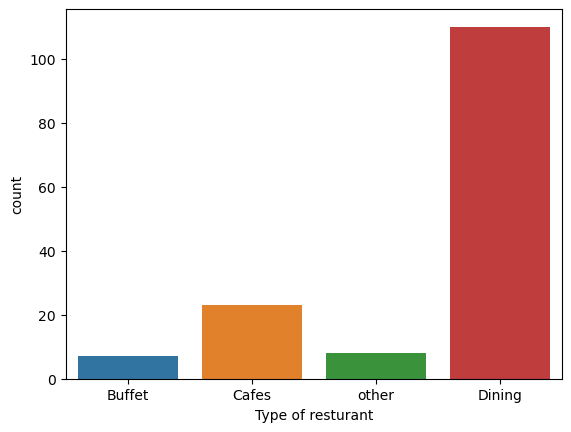

In [8]:
#to check we have to use visualization tools ie,seaborn-sns,lets see the ans for the above question:
## count plot on single categorical variable
sns.countplot(x=dataframe['listed_in(type)']) #here sns.countplot() is used to draw a box with count. 
plt.xlabel("Type of resturant") #on the x axis this will print 

# so we get ans ie,Conclusion is :Dining type of restaurant are prefered by large number of individuals.

# how many votes has each type of restaurant received from customers?

we need every restaurant type and how many votes they get...so we have to do this in visualization so how??
by taking ,on X-axis:What type of restaurant and on Y axis:we want Votes ,so here let's consider line graph

Text(0, 0.5, 'votes')

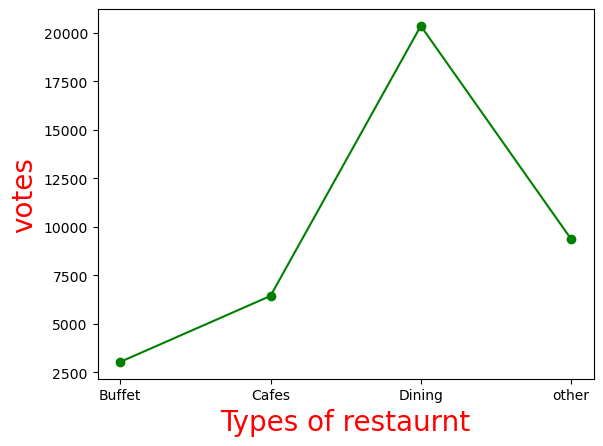

In [9]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum() #groupby is used to group rows in a datafame based on the values of a particular column
#let me explain it in clear way(a column consist of types of restaurant ie,buffet,dining,others,cafe .so in groupby all values comes under same row (buffet,dining,others,cafe))
#so when we have only 4 rows of data then the votes,are added,sum().
result=pd.DataFrame({'votes' : grouped_data})#adding the above into a dataframe
plt.plot(result,c="green",marker="o")#the plot is comes with the sum() value near numbers
plt.xlabel("Types of restaurnt",c="red",size=20)#at x-axis ,with fontsize =20
plt.ylabel("votes",c="red",size=20) #at Y-axis ,withfont-20

explanation of above daigram ,votes of buffet is nearly above 2600,cafes are in between nearly 6000,others are nearly1000,where as the 
highest is Dining above 20000

In [10]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum() 
result=pd.DataFrame({'votes' : grouped_data})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


# Conclusion-Dining restaurants recieved max votes

# 3.Majority Rating of restaurant


to get majority of rating recevied ,we can check from histogram ie,hist() to do that we have to use dataframe of rate ,so that is possible

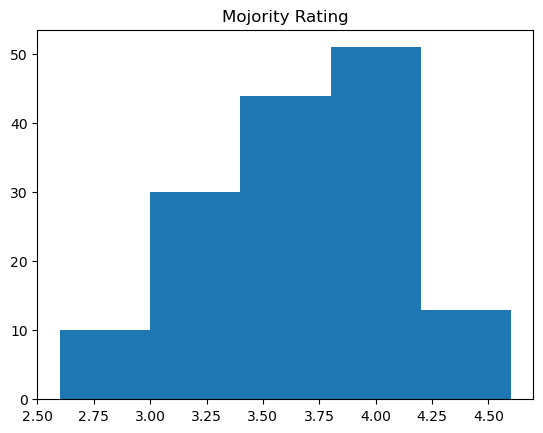

In [11]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Mojority Rating")
plt.show()#to see the histogram

# conclusion:Majority of the restaurants recevied ratings range -3.5 to 4

# 4. Average spending on each order?

In [12]:
dataframe.head() #so here the cost plays main roles

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

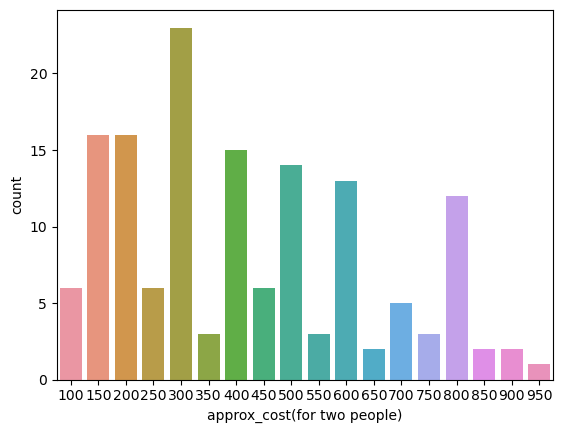

In [13]:
c_data=dataframe['approx_cost(for two people)']#taking the dataframe of approx_cost(for2people)
sns.countplot(x=c_data)#here is the plot

# conclusion :as you can see the graph we can say that majority is 300 means the cost of ruees 300

# 5. which mode receives max rating

which mode means online-yes or offline-no 

<Axes: xlabel='online_order', ylabel='rate'>

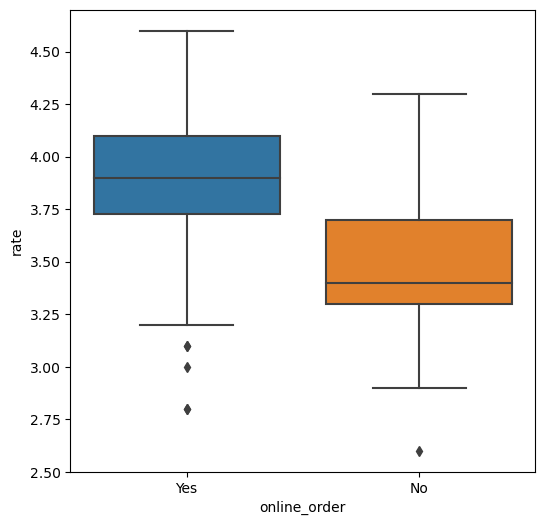

In [14]:
plt.figure(figsize=(6,6)) #boxplot fig
sns.boxplot(x='online_order',y="rate",data=dataframe)

# here the conclusion -offline order received lower rating in comparision to online order 

# 6.which type of restaurnt received more offline orders,so that zomato can provide those customers with some good offers?

In [15]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


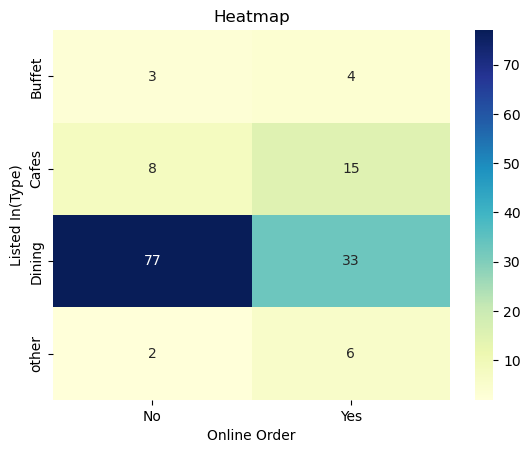

In [16]:
#Sets the row index of the pivot table as the values in the "listed_in(type)" column
#Uses unique values from the "online_order" column as column headers
#aggfunc (Aggregation Function) :Counts the number of occurrences for each combination of "listed_in(type)" and "online_order".
pivot_table = dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
#fill_value=0: Replaces missing values with 0
#-------graph
#cmap="YlGnBu": Uses the "Yellow-Green-Blue" colormap for better visualization.
#fmt='d': Formats the numbers as integers (d means decimal integer).
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap")#used for title 
plt.xlabel("Online Order")#used for x-axis label
plt.ylabel("Listed In(Type)")#for y-axis label
plt.show()#to show the graph

Show darker blue for higher values.
Show lighter yellow for lower values.
Have annotated values inside each cell.


# conclusions:Dining restaurants accepts offline orders,cafe-online.

# online order 

<Axes: xlabel='online_order', ylabel='count'>

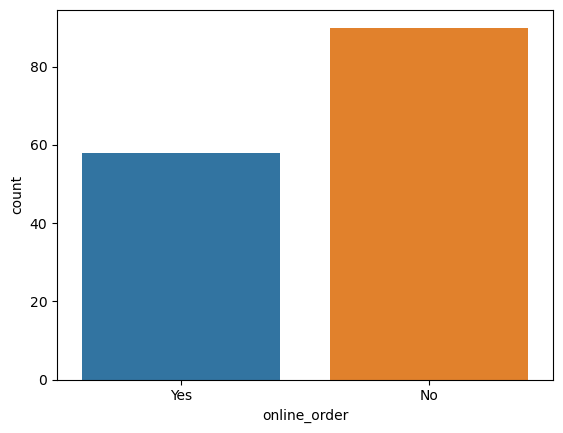

In [20]:
sns.countplot(x=dataframe['online_order'])

# Conclusion: This suggests that a majority of the restaurants do not accept online orders.

